
Fashion Data

pca.fit(X) needs X to be "array-like, shape (n_samples, n_features)".
See here: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit

You can use this code to bring the data into a format to be used with PCA. 
Note, that the images of men clothing or in a folder called 'man_200'.
Note also, that you would need to do this for two types of your choosing to 
perform classification.

It's a good idea to print out the arrays and shapes at each step to know what's
happening in the background!

There are probably a million ways to do this, don't feel constrained to use this snippet.

Code Link: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [5]:
from glob import glob
from PIL import Image
from resizeimage import resizeimage
import numpy as np

# create paths for all images
man_images = glob('man_200/*')

man_flattened = []
# for each image path
for path in man_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, [20, 10])
            # flatten the matrix to an array and append it to all flattened images
            man_flattened.append((np.array(cover).flatten(), 0))

            

# Flatten it once more
man_flattened = np.asarray(man_flattened)

# Declare which are the X and Y inputs
X_man = man_flattened[:,0]
Y_man = man_flattened[:,1]

# Use np.stack to put the data into the right dimension
X_man = np.stack(i for i in X_man)
Y_man = np.stack(i for i in Y_man)


/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_81313/4029016481.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  man_flattened = np.asarray(man_flattened)


In [25]:
woman_images = glob('woman_200/*')
woman_flattened = []
# for each image path
for path in woman_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, [20, 10])
            # flatten the matrix to an array and append it to all flattened images
            woman_flattened.append((np.array(cover).flatten(), 1))


# Flatten it once more
woman_flattened = np.asarray(woman_flattened)

# Declare which are the X and Y inputs
X_wom = woman_flattened[:,0]
Y_wom = woman_flattened[:,1]

# Use np.stack to put the data into the right dimension
X_wom = np.stack(i for i in X_wom)
Y_wom = np.stack(i for i in Y_wom)


/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_82995/2458865537.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  woman_flattened = np.asarray(woman_flattened)


In [26]:
X_man.shape, Y_man.shape

((1242, 600), (1242,))

In [27]:
X_wom.shape, Y_wom.shape

((1270, 600), (1270,))

In [41]:
X = np.vstack((X_man, X_wom))
Y = np.hstack((Y_man, Y_wom))
X.shape, Y.shape

((2512, 600), (2512,))

In [44]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [45]:
principalDf

,principal component 1,principal component 2
0,1602.599414,348.495487
1,595.647668,1720.174491
2,-785.717589,-368.252739
3,348.028002,1634.488235
4,-731.474937,559.267550
...,...,...
2507,215.119044,282.709748
2508,-816.728876,-1022.869979
2509,741.416685,400.873329
2510,-1654.834730,-514.528817


In [54]:
finalDf = pd.concat([principalDf, pd.DataFrame(Y, columns = ['Y'])], axis = 1)
finalDf

,principal component 1,principal component 2,Y
0,1602.599414,348.495487,0
1,595.647668,1720.174491,0
2,-785.717589,-368.252739,0
3,348.028002,1634.488235,0
4,-731.474937,559.267550,0
...,...,...,...
2507,215.119044,282.709748,1
2508,-816.728876,-1022.869979,1
2509,741.416685,400.873329,1
2510,-1654.834730,-514.528817,1


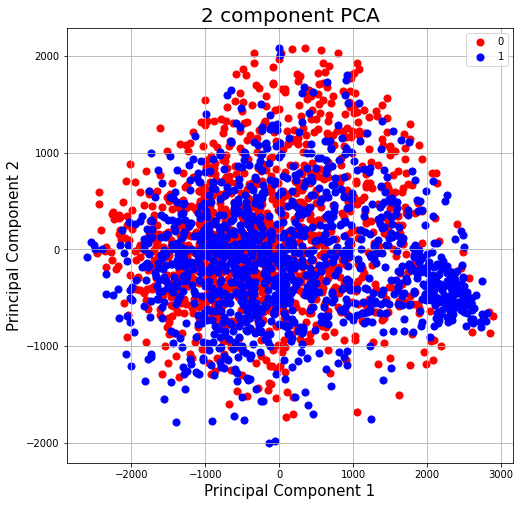

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [59]:
pca.explained_variance_ratio_

array([0.4000466 , 0.13881601])